In [1]:
from __future__ import print_function
import os
data_path = ['../Data']

In [2]:
import numpy as np;
import pandas as pd;
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import utils
#import seaborn as sns
%matplotlib inline
#Import the data
filepath_echonest = os.sep.join(data_path + ['echonest.csv'])
echonest = pd.read_csv(filepath_echonest, header =[0,1,2], index_col =[0])
filepath_tracks = os.sep.join(data_path + ['tracks.csv'])
tracks = pd.read_csv(filepath_tracks, header=[0,1], index_col = [0])

In [3]:
tracks.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                             ...              track                         \
         producer tags       ...        information interest language_code   
track_id                     ...                                             
2             NaN   []       ...                NaN     4656            en   
3             NaN   []       ...                NaN     1470            en   
5             NaN   []       ...                NaN     1933            en   
10            NaN   []       ...                NaN    54881            en   
20            NaN   []       ...                NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [4]:
echonest.head()

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        \
                                           metadata                      
         speechiness    tempo   valence  album_date         album_name   
track_id                                                                 
2           0.159310  165.922  0.576661         NaN                NaN   
3           0.461818  126.957  0.269240         NaN                NaN   
5           0.124595  100.260  0.621661         NaN                NaN   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker   
134         0.525519  114.290  0.894072         NaN                NaN   

             ...                                                       \
             ...     temporal_features                                  
             ...                   214        215       216       217   
track_id     ...                                                        
2            ...             -1.992303   6.805694  0.233070  0.192880   
3            ...             -1.582331   8.889308  0.258464  0.220905   
5            ...             -2.288358  11.527109  0.256821  0.237820   
10           ...             -3.662988  21.508228  0.283352  0.267070   
134          ...             -1.452696   2.356398  0.234686  0.199550   

                                                                        
                                                                        
               218      219       220       221        222         223  
track_id                                                                
2         0.027455  0.06408   3.67696   3.61288  13.316690  262.929749  
3         0.081368  0.06413   6.08277   6.01864  16.673548  325.581085  
5         0.060122  0.06014   5.92649   5.86635  16.013849  356.755737  
10        0.125704  0.08082   8.41401   8.33319  21.317064  483.403809  
134       0.149332  0.06440  11.26707  11.20267  26.454180  751.147705  

[5 rows x 249 columns]

In [5]:
#check if track.csv has genre 
tracks.columns

MultiIndex(levels=[['album', 'artist', 'set', 'track'], ['active_year_begin', 'active_year_end', 'associated_labels', 'bio', 'bit_rate', 'comments', 'composer', 'date_created', 'date_recorded', 'date_released', 'duration', 'engineer', 'favorites', 'genre_top', 'genres', 'genres_all', 'id', 'information', 'interest', 'language_code', 'latitude', 'license', 'listens', 'location', 'longitude', 'lyricist', 'members', 'name', 'number', 'producer', 'publisher', 'related_projects', 'split', 'subset', 'tags', 'title', 'tracks', 'type', 'website', 'wikipedia_page']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [5, 7, 9, 11, 12, 16, 17, 22, 29, 34, 35, 36, 37, 0, 1, 2, 3, 5, 7, 12, 16, 20, 23, 24, 26, 27, 31, 34, 38, 39, 32, 33, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 17, 18, 19, 21, 22, 25, 28, 30, 34, 35]])

In [6]:
tracks.track.genres_all.unique()

array(['[21]', '[10]', '[17, 10, 76, 103]', ..., '[17, 1235, 9, 63]',
       '[42, 107, 15, 1235, 183]', '[169, 10, 12, 9]'], dtype=object)

In [7]:
tracks.track.genre_top.unique()

array(['Hip-Hop', 'Pop', nan, 'Rock', 'Experimental', 'Folk', 'Jazz',
       'Electronic', 'Spoken', 'International', 'Soul-RnB', 'Blues',
       'Country', 'Classical', 'Old-Time / Historic', 'Instrumental',
       'Easy Listening'], dtype=object)

In [8]:
tracks.track.genres.unique()

array(['[21]', '[10]', '[76, 103]', ..., '[17, 63, 1235]',
       '[42, 107, 183]', '[10, 12, 169]'], dtype=object)

In [9]:
#extract parent genre from track.csv
genres = tracks['track','genre_top']
genres_df = pd.DataFrame(tracks['track','genre_top'])

In [10]:
#extract the features that we need to use for training our data from echonest.csv
echonest_audio_features = echonest['echonest', 'audio_features']

In [11]:
#List of all the features
echonest_audio_features.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [12]:
echonest_audio_features.shape

(13129, 8)

In [13]:
#See if the features require preprocessing
echonest_audio_features.describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761
std,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028
min,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010
25%,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321
50%,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743
75%,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575
max,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990


In [14]:
#check the data type of each row before preprocessing
echonest_audio_features.dtypes

acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

In [15]:
#econest_audio_features_target = pd.merge(echonest_audio_features, genres_df, right_index = True, left_index= True, how = 'left')
#econest_audio_features_target

In [16]:
echonest_audio_features['genre'] = genres[echonest_audio_features.index]
echonest_audio_features.head()

/Users/dishaumarwani/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre
track_id,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,Pop
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop


In [17]:
#print the columnn which has NAN values
for column in echonest_audio_features.columns.tolist():
    if(echonest_audio_features[column].isnull().sum() > 0):
        print(column)

genre


In [18]:
#As the target variable has missing values and it is categorical, we shouldn't be imputing values
#Moreover we have enough data to train the model even after dropping the rows with NAN values
echonest_audio_features.dropna(axis=0,how='any', inplace = True)
#lets see the dataframe after dropping NAN
print('The shape of echonest target variable after dropping NAN is', echonest_audio_features.shape)
print('The number of unique values in echonest target variable after dropping NAN is', echonest_audio_features.genre.nunique())
print('The value counts of each target variable after dropping NAN is\n', echonest_audio_features.genre.value_counts())

The shape of echonest target variable after dropping NAN is (9355, 9)
The number of unique values in echonest target variable after dropping NAN is 12
The value counts of each target variable after dropping NAN is
 Rock                   3892
Electronic             2170
Hip-Hop                 910
Folk                    874
Old-Time / Historic     357
Pop                     346
Classical               265
Jazz                    241
International           133
Instrumental             84
Blues                    66
Experimental             17
Name: genre, dtype: int64


/Users/dishaumarwani/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [19]:
#keep only top 4 rows.
echonest_audio_features_4 = echonest_audio_features[echonest_audio_features.genre.isin(['Rock','Electronic','Hip-Hop','Folk'])]
print('The shape of echonest target variable is', echonest_audio_features.shape)
print('The number of unique values in echonest target variable is', echonest_audio_features.genre.nunique())
print('The value counts of each target variable is\n', echonest_audio_features.genre.value_counts())

The shape of echonest target variable is (9355, 9)
The number of unique values in echonest target variable is 12
The value counts of each target variable is
 Rock                   3892
Electronic             2170
Hip-Hop                 910
Folk                    874
Old-Time / Historic     357
Pop                     346
Classical               265
Jazz                    241
International           133
Instrumental             84
Blues                    66
Experimental             17
Name: genre, dtype: int64


In [20]:
#agg = echonest_audio_features.groupby('genre').aggregate(np.count_values)
#agg

In [21]:
#LabelEncoding the target variable
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(echonest_audio_features['genre'])
echonest_audio_features['genre'] = le.transform(echonest_audio_features['genre'])

/Users/dishaumarwani/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


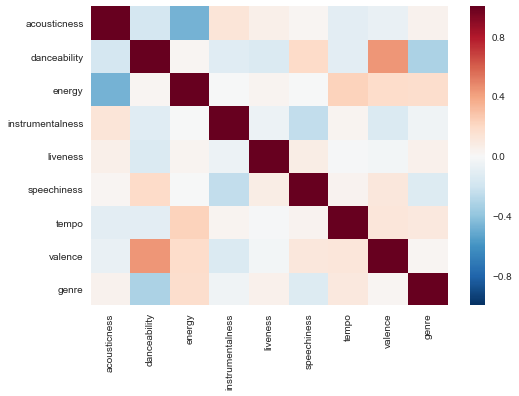

In [22]:
#plot a correlation between all the features
import seaborn as sns
corr = echonest_audio_features.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [23]:
#we'll drop valence as it does not show any correlation with the target

In [24]:
skew_columns = (echonest_audio_features
               .skew()
              .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

speechiness    3.422018
liveness       2.279073
dtype: float64

In [25]:
#Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    echonest_audio_features[col] = np.log1p(echonest_audio_features[col])
echonest_audio_features.head()

/Users/dishaumarwani/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre
track_id,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.163518,0.147825,165.922,0.576661,5
3,0.374408,0.528643,0.817461,0.001851,0.100641,0.379681,126.957,0.269240,5
5,0.043567,0.745566,0.701470,0.000697,0.317103,0.117423,100.260,0.621661,5
10,0.951670,0.658179,0.924525,0.965427,0.109279,0.032453,111.562,0.963590,10
134,0.452217,0.513238,0.560410,0.019443,0.092184,0.422335,114.290,0.894072,5


In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
echonest_audio_features_scaled = pd.DataFrame(sc.fit_transform(echonest_audio_features.drop('genre', axis=1)),
                                              index = echonest_audio_features.index,
                                              columns = echonest_audio_features.columns.tolist()[:-1])
echonest_audio_features_scaled['genre'] = echonest_audio_features['genre']
echonest_audio_features_scaled.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre
track_id,,,,,,,,,
2,-0.305190,1.081472,0.335174,-1.802354,-0.033418,0.547961,1.209559,0.520177,5
3,-0.414637,0.309857,0.981693,-1.826925,-0.555945,2.734133,0.105597,-0.594694,5
5,-1.271315,1.446562,0.571875,-1.830157,1.242922,0.261302,-0.650787,0.683372,5
10,1.080124,0.988641,1.359970,0.870650,-0.484161,-0.539885,-0.330577,1.923387,10
134,-0.213157,0.229133,0.073484,-1.777677,-0.626228,3.136317,-0.253287,1.671279,5


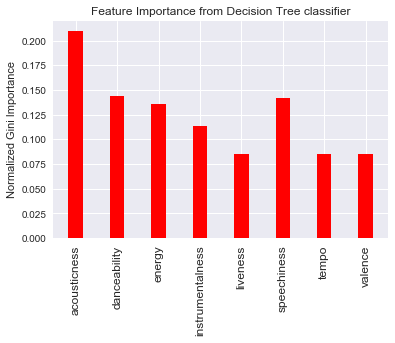

In [27]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(echonest_audio_features_scaled.drop('genre', axis =1), echonest_audio_features_scaled['genre'])
#sklearn also has build-in means to check which feature contributes more to the prediction.
importances = clf.feature_importances_
#Plot it to check 
fig, ax = plt.subplots()
width = 0.35
ax.bar(range(len(importances)), importances, width, color='r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(echonest_audio_features.columns.tolist()[:-1], rotation = 90, fontsize='large')
plt.title('Feature Importance from Decision Tree classifier')
ax.set_ylabel('Normalized Gini Importance')

In [28]:
filepath_feature_engineered = os.sep.join(data_path + ['feature_engineered.csv'])
echonest_audio_features_scaled.to_csv(filepath_feature_engineered)